# Projeto Ecommerce
Imagine a seguinte situação:<br>
Um loja possui uma valor X para investir em apenas um canal de contato com o cliente, e cabe aos analistas, recolherem o maximo de informação com base nos dados da empresa, para que esta posso tomar a melhor decisão de onde investir o valor. <br>
Os focos do investimento podem ser:<br>
Aplicativo da loja;<br>
WebSite da loja;<br>
Contato direto com o cliente, quando o mesmo visita a loja física.<br>
Será que realizando uma análise exploratória e possivelmente aplicando um algorítmo de machine learning é possível chegar a melhor conclusão para o investimento ?<br><br>
O presente DataFrame possui as seguintes colunas:<br>
**Email**: email dos clientes; <br>
**Address**: endereço;<br>
**Avatar**: avatar utilizado pelo cliente;<br> 
**Avg. Session Length**: tempo médio em que o cliente permanece na loja;<br> 
**Time on App**: tempo no aplicativo;<br>
**Time on Website**: tempo no website; <br>
**Length of Membership**: a quanto tempo o cliente esta filiado a loja;<br> 
**Yearly Amount Spent**: quanto é gasto por ano. <br>

Importando as bibliotecas necessárias, junto da base de dados, para a realização do projeto. 

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
type(df['Address'])

pandas.core.series.Series

Utilizando o método **".info()"** para obter informações a respeito do tamamho do DataFrame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Visualizando graficamente as relações: 
Visto que há a coluna de gastos anuais, vamos buscar encontrar relações entre os tempos gastos, com a quantidade gasta anualmente. <br> 
Para isso será utilizado o **"lmplot"** da biblioteca **"seaborn"**.

Relacionando o **tempo gasto no site**, **com a quantidade gasta por ano.**

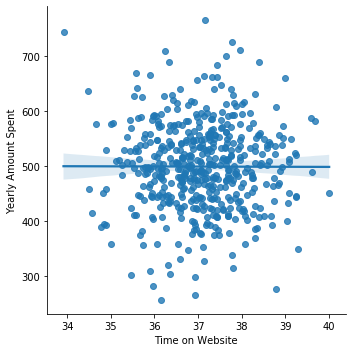

In [5]:
sns.lmplot(x='Time on Website', y='Yearly Amount Spent',data=df)

Analisando o grafico não há uma relação de linearidade, entre o tempo gasto no web site, e a quantidade gasta anualmente.  

Agora será analisado o tempo gasto no aplicativo, com a quatidade gasta anualmente. 

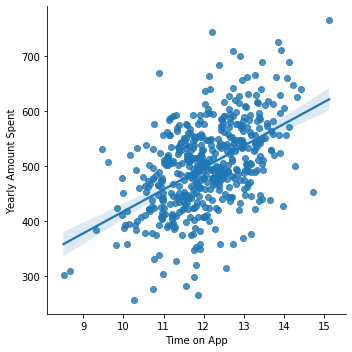

In [7]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent',data=df)

Neste caso, há uma relação linear, não muito assertiva, sobre o tempo gasto no aplicativo, e a quantidade gasta anualmente.

Agora vamos analisar o tempo gasto pelo cliente dentro da loja, com a quatidada gasta anualmente. 

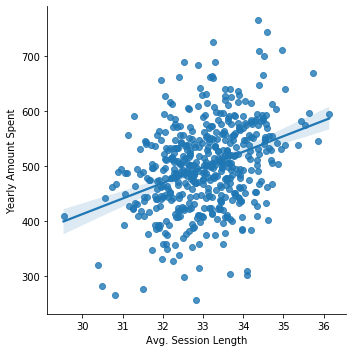

In [9]:
sns.lmplot(x='Avg. Session Length', y='Yearly Amount Spent',data=df)

Analisando o grafico, nota-se uma leve linearidade entre os valores. 

Agora será utilizado o **"pairplot"** para obter mais visualizações graficas a respeito dos valores numéricos do DataFrame.

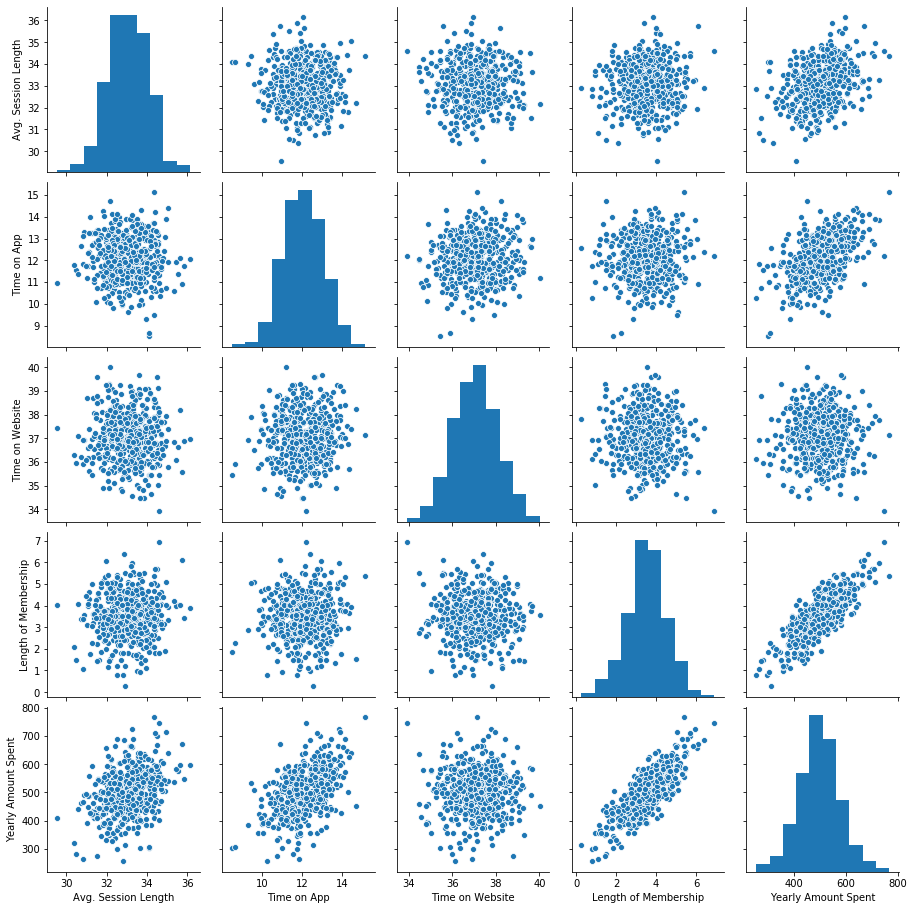

In [10]:
sns.pairplot(df)

Nota-se uma relação consistente de linearidade entre quanto tempo o cliente está filiado a loja, e quando gasta anualmente. 

# Aplicação do algoritmo: 
Neste contexto um algoritmo de regressão linear ajudaria na tomada de decisão a respeito de onde o investimento traria mais resultados. 

Preparando os dados de treino e teste: 

In [13]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [15]:
y = df['Yearly Amount Spent']

Importando o modelo de treino e teste do **sklearn**:

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

Importando o almgoritmo de **regressão linear** do sklearn:

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(x_train,y_train) # Treinando o modelo 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Obtendo os coeficientes:

In [21]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


 # Analisando os coeficientes: 
Diante destes número podemos concluir que:<br>
A empresa deve focar em manter os seus clientes fidelizados, pois a cada aumento de 1 unidade de tempo, o cliente tende aumentar o seu gasto em **61 dólores**; <br>
Em segundo lugar, a empresa deve focar uma parte do investimento no aplicativo, pois segundo os coeficientes, a cada aumento de 1 unidade de tempo, o cliente tende a gastar **37 dólores** a mais anualmente;<br>
Em terceiro lugar, a cada 1 unidade de tempo que o cliente gastar na loja, ele tende a haver um aumento de **25 dólores** em seus gastos anuais;<br>
Em ultimo lugar, há o tempo no website, que não influencia significativamente os gastos anuais dos clientes. 

# Testando o modelo 

In [22]:
predictions = lm.predict(x_test)

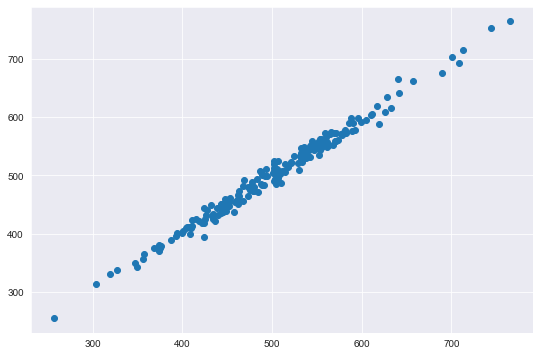

In [23]:
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
plt.scatter(y_test,predictions)

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.742671285838735
MSE: 93.83297800820081
RMSE: 9.686742383701592


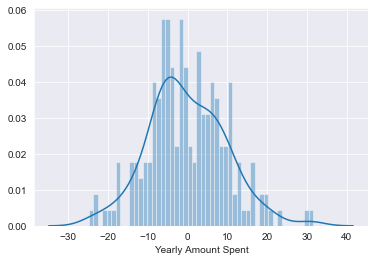

In [26]:
sns.distplot((y_test-predictions),bins=50);